In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/S4025371/Downloads/edge-iiotset/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv', low_memory=False)

In [3]:
print (df.columns)

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [4]:
filtered_df = df[df['Attack_type'].isin(['Normal', 'DDoS_UDP'])]
selected_columns = filtered_df[['dns.qry.name', 'icmp.seq_le', 'udp.stream', 'Attack_label']]

In [5]:
attack_type_counts = df['Attack_type'].value_counts().reset_index()
attack_type_counts

,Attack_type,count
0,Normal,24301
1,DDoS_UDP,14498
2,DDoS_ICMP,14090
3,Ransomware,10925
4,DDoS_HTTP,10561
5,SQL_injection,10311
6,Uploading,10269
7,DDoS_TCP,10247
8,Backdoor,10195
9,Vulnerability_scanner,10076


In [7]:
summary_stats = selected_columns.groupby('Attack_label')['udp.stream'].agg(['mean', 'median', 'quantile', 'max', 'min']).reset_index()
summary_stats

,Attack_label,mean,median,quantile,max,min
0,0,1.998420e+01,0.0,0.0,60076.0,0.0
1,1,1.318491e+06,1309285.5,1309285.5,2898725.0,12.0


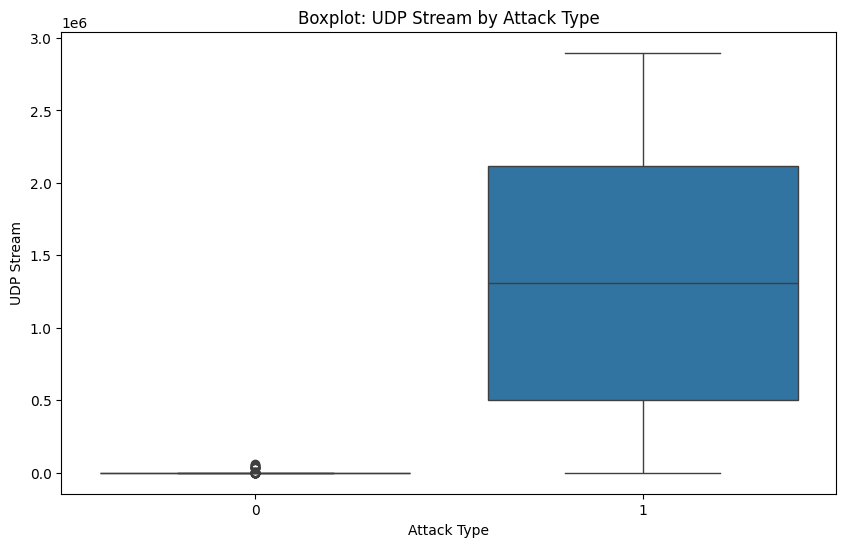

In [8]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attack_label', y='udp.stream', data=selected_columns)
plt.title('Boxplot: UDP Stream by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('UDP Stream')
plt.show()

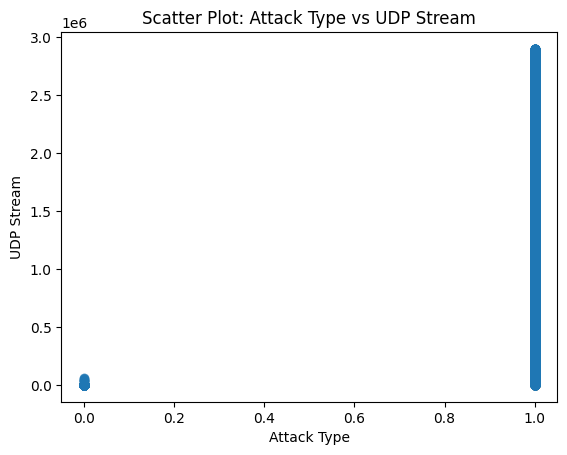

In [9]:
plt.scatter(selected_columns['Attack_label'], selected_columns['udp.stream'], alpha=0.5)
plt.title('Scatter Plot: Attack Type vs UDP Stream')
plt.xlabel('Attack Type')
plt.ylabel('UDP Stream')
plt.show()

Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'selected_columns'
# Select features and target variable
features = selected_columns[[ 'udp.stream']]
target = selected_columns['Attack_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Print the results
print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', report)

Accuracy: 0.9966

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4885
           1       1.00      0.99      1.00      2875

    accuracy                           1.00      7760
   macro avg       1.00      1.00      1.00      7760
weighted avg       1.00      1.00      1.00      7760



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'selected_columns'
# Select features and target variable
features = selected_columns[[ 'icmp.seq_le']]
target = selected_columns['Attack_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Print the results
print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', report)

Accuracy: 0.6639

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79      4885
           1       1.00      0.09      0.17      2875

    accuracy                           0.66      7760
   macro avg       0.83      0.55      0.48      7760
weighted avg       0.78      0.66      0.56      7760



In [12]:
DDOSUDP= df[df['Attack_type'].isin(['DDoS_UDP'])]
summary_result = DDOSUDP.describe().transpose()
print(summary_result)

                             count          mean            std   min  \
arp.opcode                 14498.0  0.000000e+00       0.000000   0.0   
arp.hw.size                14498.0  0.000000e+00       0.000000   0.0   
icmp.checksum              14498.0  0.000000e+00       0.000000   0.0   
icmp.seq_le                14498.0  3.163336e+03   11255.529072   0.0   
icmp.transmit_timestamp    14498.0  0.000000e+00       0.000000   0.0   
icmp.unused                14498.0  0.000000e+00       0.000000   0.0   
http.content_length        14498.0  0.000000e+00       0.000000   0.0   
http.response              14498.0  0.000000e+00       0.000000   0.0   
http.tls_port              14498.0  0.000000e+00       0.000000   0.0   
tcp.ack                    14498.0  0.000000e+00       0.000000   0.0   
tcp.ack_raw                14498.0  0.000000e+00       0.000000   0.0   
tcp.checksum               14498.0  0.000000e+00       0.000000   0.0   
tcp.connection.fin         14498.0  0.000000e+00   

In [13]:
Normaldf= df[df['Attack_type'].isin(['Normal'])]
summary_result = Normaldf.describe().transpose()
print(summary_result)

                             count          mean           std  min  \
arp.opcode                 24301.0  1.892926e-03  4.710243e-02  0.0   
arp.hw.size                24301.0  1.036994e-02  2.492282e-01  0.0   
icmp.checksum              24301.0  0.000000e+00  0.000000e+00  0.0   
icmp.seq_le                24301.0  0.000000e+00  0.000000e+00  0.0   
icmp.transmit_timestamp    24301.0  0.000000e+00  0.000000e+00  0.0   
icmp.unused                24301.0  0.000000e+00  0.000000e+00  0.0   
http.content_length        24301.0  0.000000e+00  0.000000e+00  0.0   
http.response              24301.0  0.000000e+00  0.000000e+00  0.0   
http.tls_port              24301.0  0.000000e+00  0.000000e+00  0.0   
tcp.ack                    24301.0  5.339086e+06  2.697221e+07  0.0   
tcp.ack_raw                24301.0  1.794106e+09  1.296059e+09  0.0   
tcp.checksum               24301.0  3.250189e+04  1.898810e+04  0.0   
tcp.connection.fin         24301.0  1.069915e-01  3.091088e-01  0.0   
tcp.co